In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../data/churn_data.csv')

In [3]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
#we need to convert our yes/no and true/false into 0's and 1's

churn_dict = {False: 0, True: 1}
yes_no_dict = {'no': 0, 'yes': 1}
df['churn'].replace(churn_dict, inplace=True)
df['international plan'].replace(yes_no_dict, inplace=True)
df['voice mail plan'].replace(yes_no_dict, inplace=True)

In [5]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [6]:
#pop off uneeded columns

df = df.drop('phone number', axis=1)
df = df.drop('area code', axis=1)

df

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,WV,68,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,RI,28,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,CT,184,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


In [7]:
#lets check our target variables value count for balance

df.churn.value_counts()

#looks like we have a large imbalance, this is something we can fix using SMOTE

0    2850
1     483
Name: churn, dtype: int64

In [8]:
#let's now prepare our data for the train_test_split

X = df.drop('churn', axis=1)
y = df.churn

In [9]:
#we must import the proper packages to perform train_test_split

from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2021, test_size=0.20)

In [10]:
#let's try to create a pipeline to do all of our preprocessing for us

from imblearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

preprocessing = make_column_transformer((OneHotEncoder(), make_column_selector(dtype_include=object)),
                                       (StandardScaler(), make_column_selector(dtype_include=np.number),
                                        SMOTE()))

preprocessing

ColumnTransformer(transformers=[('onehotencoder', OneHotEncoder(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ffda432cb00>),
                                ('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ffda432cbe0>)])

In [11]:
preprocessing.fit_transform(X_train)

<2666x68 sparse matrix of type '<class 'numpy.float64'>'
	with 47988 stored elements in Compressed Sparse Row format>

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

dt_pipeline = make_pipeline(preprocessing, DecisionTreeClassifier(random_state=2021))
rf_pipeline = make_pipeline(preprocessing, RandomForestClassifier(random_state=2021))
lr_pipeline = make_pipeline(preprocessing, LogisticRegression(random_state=2021))
et_pipeline = make_pipeline(preprocessing, ExtraTreesClassifier(random_state=2021))
kn_pipeline = make_pipeline(preprocessing, KNeighborsClassifier())

In [13]:
dt_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ffda432cb00>),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ffda432cbe0>)])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=2021))])

In [14]:
rf_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ffda432cb00>),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ffda432cbe0>)])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=2021))])

In [15]:
lr_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ffda432cb00>),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ffda432cbe0>)])),
                ('logisticregression', LogisticRegression(random_state=2021))])

In [16]:
et_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ffda432cb00>),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ffda432cbe0>)])),
                ('extratreesclassifier',
                 ExtraTreesClassifier(random_state=2021))])

In [17]:
kn_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ffda432cb00>),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ffda432cbe0>)])),
                ('kneighborsclassifier', KNeighborsClassifier())])

## Param_Grids for various pipelines

In [19]:
#we need to create different param_grids for each pipeline

dt_param_grid = {
    'decisiontreeclassifier__criterion': ['entropy', 'gini'],
    'decisiontreeclassifier__splitter': ['best', 'random'],
    'decisiontreeclassifier__max_depth': [2, 5, 10],
    'decisiontreeclassifier__max_features': ['auto', 'sqrt', 'log2'],
    'decisiontreeclassifier__class_weight': ['none', 'balanced']
    
}

rf_param_grid = {
    'randomforestclassifier__n_estimators': [100, 1000, 2000],
    'randomforestclassifier__max_depth': [2, 5, 10]
    
}

lr_param_grid = {
    'logisticregression__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'logisticregression__dual': [True, False],
    'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'logisticregression__multi_class': ['auto', 'ovr', 'multinomial'],
    'logisticregression__n_jobs': [10, 20, 30],
    'logisticregression__C': [0.01, 0.1, 0.5]
    
}

et_param_grid = {
    'extratreesclassifier__criterion': ['entropy', 'gini'],
    'extratreesclassifier__max_depth': [2, 5, 10],
    'extratreesclassifier__n_estimators': [100, 250, 500],
    'extratreesclassifier__max_features': ['auto', 'sqrt', 'log2'],
    'extratreesclassifier__class_weight': ['none', 'balanced']
    
}

kn_param_grid = {
    'kneighborsclassifier__n_neighbors': [5, 10, 20],
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'kneighborsclassifier__leaf_size': [25, 50, 100],
    'kneighborsclassifier__p': [1, 2],
    'kneighborsclassifier__metric': ['minkowski', 'manhattan']
    
}

## RandomForest Model Using Pipeline

In [20]:
search_rf = GridSearchCV(rf_pipeline, rf_param_grid, n_jobs=-1)

search_rf.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7ffda432cb00>),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7ffda432cbe0>)])),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=2021))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': [2, 5, 10],
      

In [21]:
search_rf

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7ffda432cb00>),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7ffda432cbe0>)])),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=2021))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': [2, 5, 10],
      

In [22]:
search_rf.best_params_

{'randomforestclassifier__max_depth': 10,
 'randomforestclassifier__n_estimators': 2000}

In [23]:
best_rf_pipeline = search_rf.best_estimator_

In [24]:
best_rf_cross_val = cross_val_score(best_rf_pipeline, X_train, y_train, scoring='f1')

## DecisionTree Model Using Pipeline

In [25]:
search_dt = GridSearchCV(dt_pipeline, dt_param_grid, n_jobs=-1)

search_dt.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7ffda432cb00>),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7ffda432cbe0>)])),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier(random_state=2021))]),
             n_jobs=-1,
             param_grid={'decisiontreeclassifier__class_weight': ['none',
      

In [26]:
search_dt.best_params_

{'decisiontreeclassifier__class_weight': 'balanced',
 'decisiontreeclassifier__criterion': 'entropy',
 'decisiontreeclassifier__max_depth': 10,
 'decisiontreeclassifier__max_features': 'auto',
 'decisiontreeclassifier__splitter': 'best'}

In [27]:
best_dt_pipeline = search_dt.best_estimator_

In [28]:
best_dt_cross_val = cross_val_score(best_dt_pipeline, X_train, y_train, scoring='f1')

## LogisticRegression Model Using Pipeline

In [29]:
search_lr = GridSearchCV(lr_pipeline, lr_param_grid, n_jobs=-1)

search_lr.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7ffda432cb00>),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7ffda432cbe0>)])),
                                       ('logisticregression',
                                        L...21))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [0.01, 0.1, 0.5],
                         'logisticregression__dual

In [30]:
search_lr.best_params_

{'logisticregression__C': 0.01,
 'logisticregression__dual': False,
 'logisticregression__multi_class': 'auto',
 'logisticregression__n_jobs': 10,
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'newton-cg'}

In [31]:
best_lr_pipeline = search_lr.best_estimator_

In [32]:
best_lr_cross_val = cross_val_score(best_lr_pipeline, X_train, y_train, scoring='f1')

## ExtraTrees Model Using Pipeline

In [33]:
search_et = GridSearchCV(et_pipeline, et_param_grid, n_jobs=-1)

search_et.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7ffda432cb00>),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7ffda432cbe0>)])),
                                       ('extratreesclassifier',
                                        ExtraTreesClassifier(random_state=2021))]),
             n_jobs=-1,
             param_grid={'extratreesclassifier__class_weight': ['none',
            

In [34]:
search_et.best_params_

{'extratreesclassifier__class_weight': 'balanced',
 'extratreesclassifier__criterion': 'gini',
 'extratreesclassifier__max_depth': 10,
 'extratreesclassifier__max_features': 'auto',
 'extratreesclassifier__n_estimators': 500}

In [35]:
best_et_pipeline = search_et.best_estimator_

In [36]:
best_et_cross_val = cross_val_score(best_et_pipeline, X_train, y_train, scoring='f1')

## KNeighbors Model Using Pipeline

In [37]:
search_kn = GridSearchCV(kn_pipeline, kn_param_grid, n_jobs=-1)

search_kn.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7ffda432cb00>),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7ffda432cbe0>)])),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'kneighborsclassifier__algorithm': ['auto',
                                

In [38]:
search_kn.best_params_

{'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 25,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__n_neighbors': 5,
 'kneighborsclassifier__p': 1,
 'kneighborsclassifier__weights': 'uniform'}

In [39]:
best_kn_pipeline = search_kn.best_estimator_

In [40]:
best_kn_cross_val = cross_val_score(best_kn_pipeline, X_train, y_train, scoring='f1')

## Mean of Models

In [194]:
print(f"RandomForest: {best_rf_cross_val.mean()}\n DecisionTree: {best_dt_cross_val.mean()}\n KNeighbors: {best_kn_cross_val.mean()}\n LogisticRegression: {best_lr_cross_val.mean()}\n ExtraTrees: {best_et_cross_val.mean()}")

RandomForest: 0.6162381988178686
 DecisionTree: 0.49161777125440886
 KNeighbors: 0.48455377627943996
 LogisticRegression: 0.2248114677359882
 ExtraTrees: 0.6481831855744898


In [42]:
#refit best model onto training data

best_et_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ffda2b54240>),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ffda2e93be0>)])),
                ('extratreesclassifier',
                 ExtraTreesClassifier(class_weight='balanced', max_depth=10,
                                      n_estimators=500, random_state=2021))])

In [45]:
from sklearn.metrics import f1_score, accuracy_score

#checking the f1 score of best model using the training and testing data
#both are similar, thus we can conclude that our model is reliable

f1_score_train_mean = best_et_cross_val.mean()
f1_score_test_mean = cross_val_score(best_et_pipeline, X_test, y_test, scoring='f1').mean()

print(f'Training F1 Score: {f1_score_train_mean}')
print(f'Testing F1 Score: {f1_score_test_mean}')

Training F1 Score: 0.6481831855744898
Testing F1 Score: 0.6179055216206919


In [46]:
#checking the accuracy of our best model on training and testing data
#both are similar,thus we can conclude that our model is reliable

best_et_pipeline.fit(X_train, y_train)
train_preds = best_et_pipeline.predict(X_train)
test_preds = best_et_pipeline.predict(X_test)

print(f'Training Accuracy: {accuracy_score(y_train, train_preds)}')
print(f'Testing Accuracy: {accuracy_score(y_test, test_preds)}')

Training Accuracy: 0.9253563390847712
Testing Accuracy: 0.8665667166416792


## Importance of Customer Service Calls in Predictions

In [ ]:
search_et_no_csc = GridSearchCV(et_pipeline, et_param_grid, n_jobs=-1)

search_et_no_csc.fit(X_train.drop('customer service calls', axis=1), y_train)

In [ ]:
search_et_no_csc.best_params_

In [ ]:
best_et_pipeline_no_csc = search_et_no_csc.best_estimator_

In [ ]:
best_et_cross_val_no_csc = cross_val_score(best_et_pipeline_no_csc, X_train.drop('customer service calls', axis=1), y_train, scoring='f1').mean()

In [ ]:
print(f'Without Customer Service Calls: {best_et_cross_val_no_csc}')
print(f'With Customer Service Calls: {f1_score_train_mean}')

In [ ]:
cmaps_misc = [\
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar']
cmaps_qual = ['Pastel1', 'Pastel2', 'Paired', 'Accent',\
                        'Dark2', 'Set1', 'Set2', 'Set3',
                        'tab10', 'tab20', 'tab20b', 'tab20c']
cmaps_cyc = ['twilight', 'twilight_shifted', 'hsv']
cmaps_list_seq2 = ['binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']
cmaps_list_diverging = ['PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']
cmap_list_uniform = ['viridis', 'plasma', 'inferno', 'magma', 'cividis']

In [ ]:
colors = ['flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern', 'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg', 'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar', 'Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'twilight', 'twilight_shifted', 'hsv', 'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink','spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia','hot', 'afmhot', 'gist_heat', 'copper','PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic','viridis', 'plasma', 'inferno', 'magma', 'cividis']

In [ ]:
for cmap in colors:
    plot_confusion_matrix(best_et_pipeline, X_test, y_test, cmap=cmap)
    plt.title(cmap)
    plt.show()

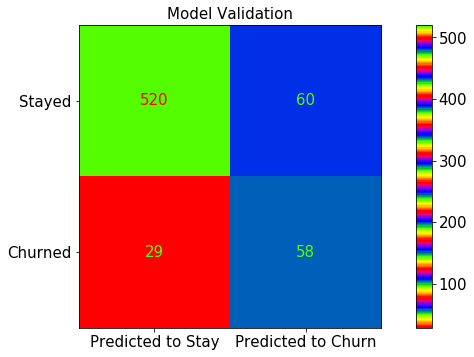

In [81]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(10,5))

axes.set_title("Model Validation")
x_tick_marks = ['Predicted to Stay', 'Predicted to Churn']
y_tick_marks = ['Stayed', 'Churned']

plot_confusion_matrix(best_et_pipeline, X_test, y_test, ax=axes, cmap="prism", display_labels=y_tick_marks)

plt.xticks([0,1], x_tick_marks)
axes.set_xlabel('')
axes.set_ylabel('')

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


plt.tight_layout()
plt.show()

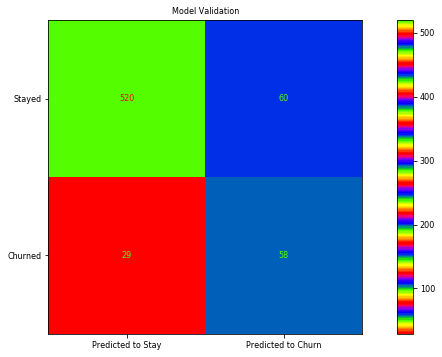

<Figure size 432x288 with 0 Axes>

In [83]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(10,5))

axes.set_title("Model Validation")
x_tick_marks = ['Predicted to Stay', 'Predicted to Churn']
y_tick_marks = ['Stayed', 'Churned']

plot_confusion_matrix(best_et_pipeline, X_test, y_test, ax=axes, cmap="prism", display_labels=y_tick_marks)

plt.xticks([0,1], x_tick_marks)
axes.set_xlabel('')
axes.set_ylabel('')

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


plt.tight_layout()
plt.show()
plt.savefig('images/extra_trees_confusion_matrix.png', transparent=True)

In [82]:
!mkdir images

In [136]:
best_et_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ffda2b54240>),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ffda2e93be0>)])),
                ('extratreesclassifier',
                 ExtraTreesClassifier(class_weight='balanced', max_depth=10,
                                      n_estimators=500, random_state=2021))])

In [146]:
et_feature_importances = best_et_pipeline.steps[1][1].feature_importances_

In [156]:
et_feature_importances

array([0.00258154, 0.00210923, 0.00210375, 0.00154645, 0.00093808,
       0.00171013, 0.00325996, 0.0031624 , 0.00116304, 0.0017475 ,
       0.00094902, 0.0027745 , 0.00161545, 0.00187117, 0.00766211,
       0.00334701, 0.00121207, 0.00218508, 0.0028421 , 0.00287616,
       0.00319884, 0.00352212, 0.00506593, 0.00161343, 0.0020377 ,
       0.00566499, 0.00529069, 0.00196316, 0.00181434, 0.00293203,
       0.00300064, 0.00957259, 0.00342985, 0.00080783, 0.00232193,
       0.00259254, 0.00298754, 0.00328953, 0.00132721, 0.0053727 ,
       0.00279809, 0.00276532, 0.00266686, 0.00257322, 0.00188304,
       0.00840748, 0.00124447, 0.0015382 , 0.00143316, 0.00388418,
       0.00178955, 0.01137902, 0.22498099, 0.04704402, 0.0287052 ,
       0.11564627, 0.01268328, 0.11656238, 0.02804118, 0.01105185,
       0.03059196, 0.01402612, 0.01080315, 0.01442473, 0.0184699 ,
       0.01642787, 0.01950382, 0.13321233])

In [139]:
best_et_pipeline.named_steps

{'columntransformer': ColumnTransformer(transformers=[('onehotencoder', OneHotEncoder(),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ffda2b54240>),
                                 ('standardscaler', StandardScaler(),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ffda2e93be0>)]),
 'extratreesclassifier': ExtraTreesClassifier(class_weight='balanced', max_depth=10, n_estimators=500,
                      random_state=2021)}

In [145]:
best_et_pipeline.named_steps['standardscaler'].get_feature_names()

KeyError: 'standardscaler'

In [ ]:
coef_log1 = {}
for coef, feat in zip(,X_train_oh_sc_resamp.columns):
    coef_log1[feat] = coef
    
log1_dict = coef_log1

log1_dict

In [180]:
et_dict

{'account length': 0.002581535009061759,
 'international plan': 0.002109226781666918,
 'voice mail plan': 0.002103748904989105,
 'number vmail messages': 0.0015464521017542058,
 'total day minutes': 0.0009380786304271744,
 'total day calls': 0.0017101284391014342,
 'total day charge': 0.003259961859933837,
 'total eve minutes': 0.003162403246382117,
 'total eve calls': 0.001163035733859368,
 'total eve charge': 0.0017474977005077679,
 'total night minutes': 0.000949022695754378,
 'total night calls': 0.00277449674239552,
 'total night charge': 0.001615454532337387,
 'total intl minutes': 0.0018711680184347753,
 'total intl calls': 0.007662110949917248,
 'total intl charge': 0.0033470091004430204,
 'customer service calls': 0.0012120735471571925,
 'state_AL': 0.0021850839601399276,
 'state_AR': 0.0028421034045458993,
 'state_AZ': 0.0028761597008781117,
 'state_CA': 0.0031988442117028234,
 'state_CO': 0.003522117404406866,
 'state_CT': 0.0050659304185273835,
 'state_DC': 0.00161343426150

In [183]:
et_feat_imp = {}
for coef, feat in zip(et_feature_importances,X_train_oh_sc_resamp.columns):
    et_feat_imp[feat] = coef
    
et_dict = et_feat_imp

et_dict

et_items = et_dict.items()
top_17 = list(et_items)[:17]

dict(top_17)

{'account length': 0.002581535009061759,
 'international plan': 0.002109226781666918,
 'voice mail plan': 0.002103748904989105,
 'number vmail messages': 0.0015464521017542058,
 'total day minutes': 0.0009380786304271744,
 'total day calls': 0.0017101284391014342,
 'total day charge': 0.003259961859933837,
 'total eve minutes': 0.003162403246382117,
 'total eve calls': 0.001163035733859368,
 'total eve charge': 0.0017474977005077679,
 'total night minutes': 0.000949022695754378,
 'total night calls': 0.00277449674239552,
 'total night charge': 0.001615454532337387,
 'total intl minutes': 0.0018711680184347753,
 'total intl calls': 0.007662110949917248,
 'total intl charge': 0.0033470091004430204,
 'customer service calls': 0.0012120735471571925}

In [181]:
def top_num(my_dict, top_num=5):
    dict_keys = [key for key in my_dict.keys()]
    dict_values = [abs(value) for value in my_dict.values()]
    
    my_dict = {dict_keys[x]: dict_values[x] for x in range(len(dict_values))}
    my_dict = dict(list(my_dict.items())[:])
    features_and_importances = zip(my_dict.keys(), my_dict.values())
    features_and_importances = sorted(features_and_importances, key = lambda x: x[1], reverse=True)
    
    return features_and_importances
#     features = [i[0].title() for i in features_and_importances[:top_num+1]]
#     print(features)
#     importances = [abs(i[1]) for i in features_and_importances[:top_num+1]]
#     print(importances)
top_num(et_dict)

[('state_OK', 0.22498099483708336),
 ('state_SD', 0.11656237945609005),
 ('state_RI', 0.11564626550953369),
 ('state_OR', 0.04704402365323128),
 ('state_UT', 0.03059196055066666),
 ('state_PA', 0.028705195557722524),
 ('state_TN', 0.028041183257478668),
 ('state_WY', 0.01950381751051553),
 ('state_WI', 0.01846990216632646),
 ('state_WV', 0.0164278681998617),
 ('state_WA', 0.014424733457593295),
 ('state_VA', 0.014026119195891354),
 ('state_SC', 0.01268328132099445),
 ('state_OH', 0.01137901545477919),
 ('state_TX', 0.011051847843481418),
 ('state_VT', 0.010803147131477786),
 ('state_IN', 0.009572591918335377),
 ('state_NE', 0.008407482131791403),
 ('total intl calls', 0.007662110949917248),
 ('state_FL', 0.0056649931971654455),
 ('state_MN', 0.0053726952212992014),
 ('state_GA', 0.005290691670669024),
 ('state_CT', 0.0050659304185273835),
 ('state_NV', 0.0038841797417788508),
 ('state_CO', 0.003522117404406866),
 ('state_KS', 0.003429845479083614),
 ('total intl charge', 0.003347009100

In [192]:
top_17_dict = dict(top_17)

In [188]:
top_num(dict(top_17))

[('total intl calls', 0.007662110949917248),
 ('total intl charge', 0.0033470091004430204),
 ('total day charge', 0.003259961859933837),
 ('total eve minutes', 0.003162403246382117),
 ('total night calls', 0.00277449674239552),
 ('account length', 0.002581535009061759),
 ('international plan', 0.002109226781666918),
 ('voice mail plan', 0.002103748904989105),
 ('total intl minutes', 0.0018711680184347753),
 ('total eve charge', 0.0017474977005077679),
 ('total day calls', 0.0017101284391014342),
 ('total night charge', 0.001615454532337387),
 ('number vmail messages', 0.0015464521017542058),
 ('customer service calls', 0.0012120735471571925),
 ('total eve calls', 0.001163035733859368),
 ('total night minutes', 0.000949022695754378),
 ('total day minutes', 0.0009380786304271744)]

In [190]:
ordered_top_17 = top_num(dict(top_17))

top_5_feat = ordered_top_17[:5]

top_5_feat

[('total intl calls', 0.007662110949917248),
 ('total intl charge', 0.0033470091004430204),
 ('total day charge', 0.003259961859933837),
 ('total eve minutes', 0.003162403246382117),
 ('total night calls', 0.00277449674239552)]

In [193]:
top_17_dict

{'account length': 0.002581535009061759,
 'international plan': 0.002109226781666918,
 'voice mail plan': 0.002103748904989105,
 'number vmail messages': 0.0015464521017542058,
 'total day minutes': 0.0009380786304271744,
 'total day calls': 0.0017101284391014342,
 'total day charge': 0.003259961859933837,
 'total eve minutes': 0.003162403246382117,
 'total eve calls': 0.001163035733859368,
 'total eve charge': 0.0017474977005077679,
 'total night minutes': 0.000949022695754378,
 'total night calls': 0.00277449674239552,
 'total night charge': 0.001615454532337387,
 'total intl minutes': 0.0018711680184347753,
 'total intl calls': 0.007662110949917248,
 'total intl charge': 0.0033470091004430204,
 'customer service calls': 0.0012120735471571925}

In [130]:
#from sklearn.feature_selection import FeatureImportance
#from sklearn.pipeline import Pipeline

from sklearn.feature_selection import SelectFromModel

feature_importance = feature_selection(best_et_pipeline)
feature_importance.plot(top_n_features=5)


NameError: name 'feature_selection' is not defined

## STOP

In [111]:
from sklearn.metrics import plot_confusion_matrix

In [117]:
f1_scores_dict = {
    "F1 Score": [
        cross_val_score(log1, X_test_final, y_test, scoring='f1').mean(), 
        cross_val_score(knc1, X_test_final, y_test, scoring='f1').mean(),
        cross_val_score(rfc1, X_test_final, y_test, scoring='f1').mean(),
        cross_val_score(etc1, X_test_final, y_test, scoring='f1').mean(),
        cross_val_score(dtc1, X_test_final, y_test, scoring='f1').mean()
    ]
}
f1_scores_df = pd.DataFrame(f1_scores_dict, index=["LogisticRegression", "KNeighbors", "RandomForest", "ExtraTrees", "DecisionTree"])
f1_scores_df

,F1 Score
LogisticRegression,0.290272
KNeighbors,0.019048
RandomForest,0.409684
ExtraTrees,0.303463
DecisionTree,0.546637


In [113]:
#knc1.fit(X_train_oh_sc_resamp, y_train_resamp)

In [114]:
type(knc1)

sklearn.neighbors._classification.KNeighborsClassifier

In [115]:
X_test_final = scale2021(ohe2021(X_test, ['state']))

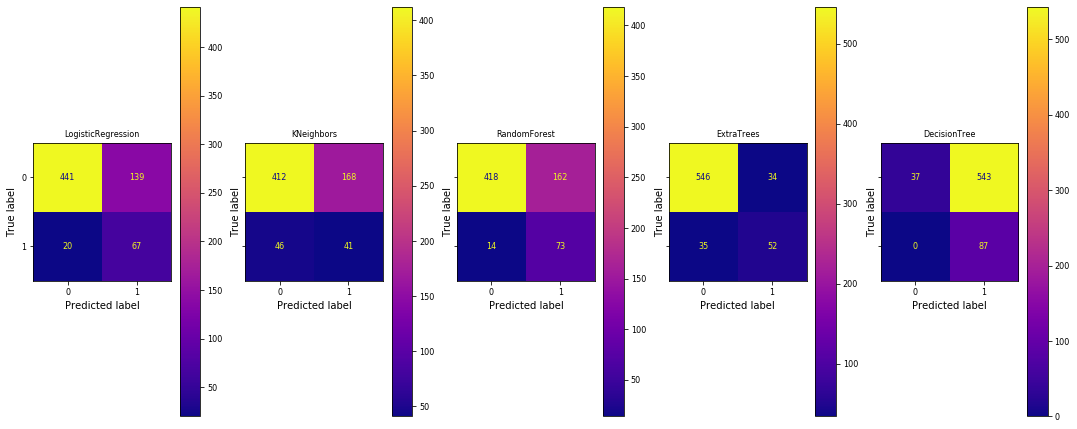

<function matplotlib.pyplot.close>

In [116]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 6), sharey=True)

plt.title("Confusion Matrix Comparison")

axes[0].set_title("LogisticRegression")
axes[1].set_title("KNeighbors")
axes[2].set_title("RandomForest")
axes[3].set_title("ExtraTrees")
axes[4].set_title("DecisionTree")

plot_confusion_matrix(log1, X_test_final, y_test, ax=axes[0], cmap="plasma")
plot_confusion_matrix(knc1, X_test_final, y_test, ax=axes[1], cmap="plasma")
plot_confusion_matrix(rfc1, X_test_final, y_test, ax=axes[2], cmap="plasma");
plot_confusion_matrix(etc1, X_test_final, y_test, ax=axes[3], cmap="plasma")
plot_confusion_matrix(dtc1, X_test_final, y_test, ax=axes[4], cmap="plasma")

plt.savefig('Various Confusion Matix')
plt.tight_layout()
plt.show()
plt.close

In [88]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

cross_val_score(dt_pipeline, X_train, y_train)

array([0.90449438, 0.89681051, 0.91744841, 0.92120075, 0.93058161])

In [89]:
cross_val_score(rf_pipeline, X_train, y_train)

array([0.91385768, 0.93621013, 0.93433396, 0.93621013, 0.94371482])

In [90]:
#lets create a function that will OneHotEncode our categorical features for us

from sklearn.preprocessing import OneHotEncoder

def ohe2021(X, column_name):
    
    #grab categorical columns
    X_cat = X[column_name]

    #grab numeric columns
    X_num = X.drop(column_name, axis=1)
    
    #let's now OneHotEncode
    ohe = OneHotEncoder(sparse=False, drop='first')
    X_cat_oh = pd.DataFrame(ohe.fit_transform(X_cat), index= X_cat.index, columns=ohe.get_feature_names(X_cat.columns))
    
    #combine X_num with X_cat now that its OneHotEncoded
    X = X_num.join(X_cat_oh)
    
    return X

In [91]:
X_train_oh = ohe2021(X_train, ['state'])

In [92]:
#we can now see that our training dataframe has been OneHotEncoded

X_train_oh.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
561,53,0,1,18,146.8,107,24.96,310.0,84,26.35,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1764,77,0,0,0,245.2,87,41.68,254.1,83,21.60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1733,130,0,0,0,124.3,70,21.13,270.7,99,23.01,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3168,201,0,0,0,225.9,110,38.40,299.1,86,25.42,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
562,99,0,1,28,200.7,88,34.12,264.2,116,22.46,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [93]:
#let's now create a function that can scale our data, remember that we only scale on our TRAINING data

from sklearn.preprocessing import StandardScaler

def scale2021(X):
    
    ss = StandardScaler()
    
    X_scaled = pd.DataFrame(ss.fit_transform(X))
    
    X_scaled.index = X.index
    
    X_scaled.columns = X.columns
    
    return X_scaled

X_train_oh_sc = scale2021(X_train_oh)

In [94]:
#we can see that we have successfully scaled our OneHotEncoded training data

X_train_oh_sc.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
561,-1.215926,-0.328029,1.620867,0.719950,-0.594966,0.326270,-0.594598,2.150149,-0.806009,2.150108,...,-0.131031,-0.126515,-0.147809,-0.160559,-0.156833,-0.151736,-0.133962,-0.151736,-0.185839,-0.153025
1764,-0.613634,-0.328029,-0.616954,-0.591007,1.193361,-0.660331,1.192879,1.045323,-0.856365,1.045630,...,-0.131031,-0.126515,-0.147809,-0.160559,-0.156833,-0.151736,-0.133962,-0.151736,-0.185839,-0.153025
1733,0.716426,-0.328029,-0.616954,-0.591007,-1.003882,-1.498942,-1.004050,1.373411,-0.050659,1.373485,...,-0.131031,-0.126515,-0.147809,-0.160559,-0.156833,-0.151736,7.464811,-0.151736,-0.185839,-0.153025
3168,2.498205,-0.328029,-0.616954,-0.591007,0.842602,0.474261,0.842226,1.934718,-0.705295,1.933863,...,-0.131031,-0.126515,6.765496,-0.160559,-0.156833,-0.151736,-0.133962,-0.151736,-0.185839,-0.153025
562,-0.061534,-0.328029,1.620867,1.448259,0.384616,-0.611001,0.384666,1.244943,0.805404,1.245598,...,-0.131031,-0.126515,-0.147809,-0.160559,-0.156833,-0.151736,-0.133962,-0.151736,-0.185839,6.534900


In [95]:
#now let's try to do something about the class imbalance using SMOTE

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=2021)

X_train_oh_sc_resamp, y_train_resamp = sm.fit_resample(X_train_oh_sc, y_train)

In [96]:
X_train_oh_sc_resamp.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,-1.215926,-0.328029,1.620867,0.719950,-0.594966,0.326270,-0.594598,2.150149,-0.806009,2.150108,...,-0.131031,-0.126515,-0.147809,-0.160559,-0.156833,-0.151736,-0.133962,-0.151736,-0.185839,-0.153025
1,-0.613634,-0.328029,-0.616954,-0.591007,1.193361,-0.660331,1.192879,1.045323,-0.856365,1.045630,...,-0.131031,-0.126515,-0.147809,-0.160559,-0.156833,-0.151736,-0.133962,-0.151736,-0.185839,-0.153025
2,0.716426,-0.328029,-0.616954,-0.591007,-1.003882,-1.498942,-1.004050,1.373411,-0.050659,1.373485,...,-0.131031,-0.126515,-0.147809,-0.160559,-0.156833,-0.151736,7.464811,-0.151736,-0.185839,-0.153025
3,2.498205,-0.328029,-0.616954,-0.591007,0.842602,0.474261,0.842226,1.934718,-0.705295,1.933863,...,-0.131031,-0.126515,6.765496,-0.160559,-0.156833,-0.151736,-0.133962,-0.151736,-0.185839,-0.153025
4,-0.061534,-0.328029,1.620867,1.448259,0.384616,-0.611001,0.384666,1.244943,0.805404,1.245598,...,-0.131031,-0.126515,-0.147809,-0.160559,-0.156833,-0.151736,-0.133962,-0.151736,-0.185839,6.534900


In [97]:
#lets check to see if we balanced our classes

df.churn.value_counts()

0    2850
1     483
Name: churn, dtype: int64

In [98]:
y_train_resamp.value_counts()

1    2270
0    2270
Name: churn, dtype: int64

In [99]:
#the first model we're going to checkout is a LogisticRegression

from sklearn.linear_model import LogisticRegression

log1 = LogisticRegression(random_state=2021)
log1.fit(X_train_oh_sc_resamp, y_train_resamp)
log1.score(X_train_oh_sc_resamp, y_train_resamp)

#score gives us our accuracy, comparing it to what it fit on in preparation for unseen data

0.798237885462555

In [100]:
#the next thing we will do is check our f1 score using cross_val_score

from sklearn.model_selection import cross_val_score

all_features_cross_val_score = cross_val_score(log1, X_train_oh_sc_resamp, y_train_resamp, cv=3)
all_features_cross_val_score

#f1 score gives us a balance between recall and accuracy

array([0.78269485, 0.79643093, 0.79048249])

In [101]:
coef_log1 = {}
for coef, feat in zip(log1.coef_[0,:],X_train_oh_sc_resamp.columns):
    coef_log1[feat] = coef
    
log1_dict = coef_log1

log1_dict

{'account length': 0.05465803660831661,
 'international plan': 0.8643214342535465,
 'voice mail plan': -1.0711561540621855,
 'number vmail messages': 0.5833956886122196,
 'total day minutes': 0.4340366106210175,
 'total day calls': 0.13459785202522626,
 'total day charge': 0.4364428169395637,
 'total eve minutes': 0.2441232588375694,
 'total eve calls': 0.04343982996400333,
 'total eve charge': 0.19552916020418074,
 'total night minutes': 0.061636974815759776,
 'total night calls': -0.0330775687848651,
 'total night charge': 0.120504044650966,
 'total intl minutes': 0.08417780777778124,
 'total intl calls': -0.20176042838853372,
 'total intl charge': 0.11572075198029565,
 'customer service calls': 0.9224756204837488,
 'state_AL': -0.19695803241769763,
 'state_AR': -0.11870998456433077,
 'state_AZ': -0.21820736138398855,
 'state_CA': -0.007653722948586534,
 'state_CO': -0.09376945413983571,
 'state_CT': -0.06862379551398427,
 'state_DC': -0.035934708182815016,
 'state_DE': -0.1159125763

In [102]:
log2 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.5)
log2.fit(X_train_oh_sc_resamp, y_train_resamp)

print("Old:", all_features_cross_val_score)
print("New:", cross_val_score(log2, X_train_oh_sc_resamp, y_train_resamp, cv=3))

Old: [0.78269485 0.79643093 0.79048249]
New: [0.78137384 0.79841375 0.79180436]


In [103]:
coef_log2 = {}
for coef, feat in zip(log2.coef_[0,:],X_train_oh_sc_resamp.columns):
    coef_log2[feat] = coef
    
log1_dict = coef_log2

log1_dict

{'account length': 0.052572462257851706,
 'international plan': 0.8543858795196344,
 'voice mail plan': -0.9790994058597706,
 'number vmail messages': 0.4946822170215518,
 'total day minutes': 0.21026301877437395,
 'total day calls': 0.12153872715981144,
 'total day charge': 0.6470725510736858,
 'total eve minutes': 0.2962397552015591,
 'total eve calls': 0.03956513370320751,
 'total eve charge': 0.12966622277732934,
 'total night minutes': 0.030739809449108053,
 'total night calls': -0.02977110661163085,
 'total night charge': 0.14036658929561194,
 'total intl minutes': 0.17909513948693973,
 'total intl calls': -0.20061915480695847,
 'total intl charge': 0.012999650354176061,
 'customer service calls': 0.917990057079267,
 'state_AL': -0.12340464456389266,
 'state_AR': -0.0591154764233462,
 'state_AZ': -0.15025484236130535,
 'state_CA': 0.035954340619644906,
 'state_CO': -0.03113463789125026,
 'state_CT': -0.0018518902406324067,
 'state_DC': 0.019985208111648337,
 'state_DE': -0.054322

In [104]:
#next model we want to checkout is ExtraTrees

from sklearn.ensemble import ExtraTreesClassifier

etc1 = ExtraTreesClassifier()
etc1.fit(X_train_oh_sc_resamp, y_train_resamp)

print("Old:", all_features_cross_val_score)
print("New:", cross_val_score(etc1, X_train_oh_sc_resamp, y_train_resamp, cv=3))

Old: [0.78269485 0.79643093 0.79048249]
New: [0.95112285 0.94315929 0.957039  ]


In [105]:
#let's checkout KNN

from sklearn.neighbors import KNeighborsClassifier

knc1 = KNeighborsClassifier()
knc1.fit(X_train_oh_sc_resamp, y_train_resamp)

print("Old:", all_features_cross_val_score)
print("New:", cross_val_score(knc1, X_train_oh_sc_resamp, y_train_resamp, cv=3))

Old: [0.78269485 0.79643093 0.79048249]
New: [0.82892999 0.83542631 0.8559154 ]


In [106]:
#now let's try svm vector

from sklearn import svm

svr1 = svm.SVR()
svr1.fit(X_train_oh_sc_resamp, y_train_resamp)

print("Old:", all_features_cross_val_score)
print("New:", cross_val_score(svr1, X_train_oh_sc_resamp, y_train_resamp, cv=3))

Old: [0.78269485 0.79643093 0.79048249]
New: [-0.0634439   0.57372578  0.        ]


In [107]:
#not so good, lets take a look at RandomForest

from sklearn.ensemble import RandomForestClassifier

rfc1 = RandomForestClassifier(random_state=2021)
rfc1.fit(X_train_oh_sc_resamp, y_train_resamp)

print("Old:", all_features_cross_val_score)
print("New:", cross_val_score(rfc1, X_train_oh_sc_resamp, y_train_resamp, cv=3))

Old: [0.78269485 0.79643093 0.79048249]
New: [0.90356671 0.93588896 0.93258427]


In [108]:
#let's checkout how DecisionTree performs

from sklearn.tree import DecisionTreeClassifier

dtc1 = DecisionTreeClassifier(random_state=2021)
dtc1.fit(X_train_oh_sc_resamp, y_train_resamp)

print("Old:", all_features_cross_val_score)
print("New:", cross_val_score(dtc1, X_train_oh_sc_resamp, y_train_resamp, cv=3))

Old: [0.78269485 0.79643093 0.79048249]
New: [0.87318362 0.91275611 0.90680767]


In [109]:
coef_dtc1 = {}
for coef, feat in zip(dtc1.coef_[0,:],X_train_oh_sc_resamp.columns):
    coef_dtc1[feat] = coef
    
dtc1_dict = coef_dtc1

dtc1_dict

AttributeError: 'DecisionTreeClassifier' object has no attribute 'coef_'